In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
import datetime as dt
import pprint as pp
import pandas as pd
from IPython.display import display
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import ParameterSampler
from sklearn.feature_extraction import DictVectorizer
%matplotlib tk
from sklearn.model_selection import train_test_split
from simulated_annealing.optimize import SimulatedAnneal

In [2]:
input_features = ['ast','blk','min', 'pts','reb',
                  'stl','to','fantasy_points', 'team_against','player_team', 'min_points', 'max_points',
                  'position', 'home_game', 'ave_points_team', 'ave_points_vs_team', 'name']
with open('nfl_featuers.pkl', 'rb') as fp:
    input_data = pickle.load(fp)

In [3]:
length = len(input_data['ast'])
pre_data_format = []
X = np.zeros((length, len(input_features)))
y = np.zeros(length)
count = 0

for i in range(0, length):
    temp_dict = {}
    if not(count%1000):
        print(count, " out of ", length)

    for a,feat in enumerate(input_features):
            temp_dict[feat] = input_data[feat][i]
    pre_data_format.append(temp_dict)

    y[count] = input_data["output_feature"][i]

    count += 1

0  out of  51215
1000  out of  51215
2000  out of  51215
3000  out of  51215
4000  out of  51215
5000  out of  51215
6000  out of  51215
7000  out of  51215
8000  out of  51215
9000  out of  51215
10000  out of  51215
11000  out of  51215
12000  out of  51215
13000  out of  51215
14000  out of  51215
15000  out of  51215
16000  out of  51215
17000  out of  51215
18000  out of  51215
19000  out of  51215
20000  out of  51215
21000  out of  51215
22000  out of  51215
23000  out of  51215
24000  out of  51215
25000  out of  51215
26000  out of  51215
27000  out of  51215
28000  out of  51215
29000  out of  51215
30000  out of  51215
31000  out of  51215
32000  out of  51215
33000  out of  51215
34000  out of  51215
35000  out of  51215
36000  out of  51215
37000  out of  51215
38000  out of  51215
39000  out of  51215
40000  out of  51215
41000  out of  51215
42000  out of  51215
43000  out of  51215
44000  out of  51215
45000  out of  51215
46000  out of  51215
47000  out of  51215
48000

In [4]:
vec = DictVectorizer()
vec.fit_transform(pre_data_format).toarray()
vec.get_feature_names()

['ast',
 'ave_points_team',
 'ave_points_vs_team',
 'blk',
 'fantasy_points',
 'home_game',
 'max_points',
 'min',
 'min_points',
 'name=AJ Hammons',
 'name=Aaron Brooks',
 'name=Aaron Gordon',
 'name=Aaron Harrison',
 'name=Abdel Nader',
 'name=Adreian Payne',
 'name=Al Horford',
 'name=Al Jefferson',
 'name=Al-Farouq Aminu',
 'name=Alan Anderson',
 'name=Alan Williams',
 'name=Alec Burks',
 'name=Alec Peters',
 'name=Alex Abrines',
 'name=Alex Caruso',
 'name=Alex Len',
 'name=Alex Poythress',
 'name=Alexis Ajinca',
 'name=Alfonzo McKinnie',
 'name=Allen Crabbe',
 'name=Alonzo Gee',
 'name=Amir Johnson',
 'name=Anderson Varejao',
 'name=Andre Drummond',
 'name=Andre Iguodala',
 'name=Andre Ingram',
 'name=Andre Roberson',
 'name=Andrew Bogut',
 'name=Andrew Harrison',
 'name=Andrew Nicholson',
 'name=Andrew White III',
 'name=Andrew Wiggins',
 'name=Ante Zizic',
 'name=Anthony Bennett',
 'name=Anthony Brown',
 'name=Anthony Davis',
 'name=Anthony Morrow',
 'name=Anthony Tolliver',
 '

In [5]:
scaler = StandardScaler()
X = vec.fit_transform(pre_data_format).toarray()

In [6]:
for l,v in zip(vec.get_feature_names(),X[0,:]):
    print(l,' : ', v)

ast  :  1.0
ave_points_team  :  92.0
ave_points_vs_team  :  0.0
blk  :  0.0
fantasy_points  :  17.3
home_game  :  1.0
max_points  :  17.3
min  :  28.4
min_points  :  17.3
name=AJ Hammons  :  0.0
name=Aaron Brooks  :  0.0
name=Aaron Gordon  :  0.0
name=Aaron Harrison  :  0.0
name=Abdel Nader  :  0.0
name=Adreian Payne  :  0.0
name=Al Horford  :  0.0
name=Al Jefferson  :  0.0
name=Al-Farouq Aminu  :  1.0
name=Alan Anderson  :  0.0
name=Alan Williams  :  0.0
name=Alec Burks  :  0.0
name=Alec Peters  :  0.0
name=Alex Abrines  :  0.0
name=Alex Caruso  :  0.0
name=Alex Len  :  0.0
name=Alex Poythress  :  0.0
name=Alexis Ajinca  :  0.0
name=Alfonzo McKinnie  :  0.0
name=Allen Crabbe  :  0.0
name=Alonzo Gee  :  0.0
name=Amir Johnson  :  0.0
name=Anderson Varejao  :  0.0
name=Andre Drummond  :  0.0
name=Andre Iguodala  :  0.0
name=Andre Ingram  :  0.0
name=Andre Roberson  :  0.0
name=Andrew Bogut  :  0.0
name=Andrew Harrison  :  0.0
name=Andrew Nicholson  :  0.0
name=Andrew White III  :  0.0
na

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=0)

In [14]:
rfr = RandomForestRegressor()

param_grid = { "max_features": list(range(1,701,9)),
                "min_samples_split": list(range(1,701,9)),
                "n_estimators": [100],
                "max_depth": list(range(1,1001,9)),
                "random_state": [0],
                 "n_jobs": [4]}
combs =1 
for k,v in param_grid.items():
    combs *= len(v)
print(combs)

print('====================================')

# Initialize Simulated Annealing and fit
sa = SimulatedAnneal(rfr, param_grid, T=100.0, T_min=0.001, alpha=0.9,
                         verbose=True,scoring='r2',n_jobs = 4)
sa.fit(X_train, y_train)


print('\n BEST:')
print(sa.best_score_, sa.best_params_)
optimized_rfr = sa.best_estimator_
y_test_pred = optimized_rfr.predict(X_test)

681408

INFO: Number of possible iterations given cooling schedule: 1092



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


2 T: 100.00000, score: 0.511151, std: 0.006942, params: {'max_features': 100, 'min_samples_split': 361, 'n_estimators': 100, 'max_depth': 442, 'random_state': 0, 'n_jobs': 4}
3 T: 100.00000, score: 0.511151, std: 0.006942, params: {'max_features': 100, 'min_samples_split': 361, 'n_estimators': 100, 'max_depth': 442, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


4 T: 100.00000, score: 0.511151, std: 0.006942, params: {'max_features': 100, 'min_samples_split': 361, 'n_estimators': 100, 'max_depth': 208, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


5 T: 100.00000, score: 0.511151, std: 0.006942, params: {'max_features': 100, 'min_samples_split': 361, 'n_estimators': 100, 'max_depth': 73, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


6 T: 100.00000, score: 0.512123, std: 0.007619, params: {'max_features': 640, 'min_samples_split': 361, 'n_estimators': 100, 'max_depth': 73, 'random_state': 0, 'n_jobs': 4}
7 T: 100.00000, score: 0.512123, std: 0.007619, params: {'max_features': 640, 'min_samples_split': 361, 'n_estimators': 100, 'max_depth': 73, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


8 T: 100.00000, score: 0.500534, std: 0.009086, params: {'max_features': 640, 'min_samples_split': 667, 'n_estimators': 100, 'max_depth': 73, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


9 T: 100.00000, score: 0.511977, std: 0.008001, params: {'max_features': 640, 'min_samples_split': 343, 'n_estimators': 100, 'max_depth': 73, 'random_state': 0, 'n_jobs': 4}
10 T: 100.00000, score: 0.511977, std: 0.008001, params: {'max_features': 640, 'min_samples_split': 343, 'n_estimators': 100, 'max_depth': 73, 'random_state': 0, 'n_jobs': 4}
11 T: 100.00000, score: 0.511977, std: 0.008001, params: {'max_features': 640, 'min_samples_split': 343, 'n_estimators': 100, 'max_depth': 73, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


12 T: 90.00000, score: 0.516217, std: 0.009949, params: {'max_features': 235, 'min_samples_split': 343, 'n_estimators': 100, 'max_depth': 73, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


13 T: 90.00000, score: 0.516217, std: 0.009949, params: {'max_features': 235, 'min_samples_split': 343, 'n_estimators': 100, 'max_depth': 640, 'random_state': 0, 'n_jobs': 4}
14 T: 90.00000, score: 0.516217, std: 0.009949, params: {'max_features': 235, 'min_samples_split': 343, 'n_estimators': 100, 'max_depth': 640, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


15 T: 90.00000, score: 0.516217, std: 0.009949, params: {'max_features': 235, 'min_samples_split': 343, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}
16 T: 90.00000, score: 0.516217, std: 0.009949, params: {'max_features': 235, 'min_samples_split': 343, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}
17 T: 90.00000, score: 0.516217, std: 0.009949, params: {'max_features': 235, 'min_samples_split': 343, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}
18 T: 90.00000, score: 0.516217, std: 0.009949, params: {'max_features': 235, 'min_samples_split': 343, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}
19 T: 90.00000, score: 0.516217, std: 0.009949, params: {'max_features': 235, 'min_samples_split': 343, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}
20 T: 90.00000, score: 0.516217, std: 0.009949, params: {'max_features': 235, 'min_samples_split': 343, 'n_estimators': 100, 

[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


21 T: 90.00000, score: 0.515943, std: 0.006507, params: {'max_features': 334, 'min_samples_split': 343, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}
22 T: 81.00000, score: 0.515943, std: 0.006507, params: {'max_features': 334, 'min_samples_split': 343, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


23 T: 81.00000, score: 0.528148, std: 0.010803, params: {'max_features': 334, 'min_samples_split': 190, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


24 T: 81.00000, score: 0.518899, std: 0.007539, params: {'max_features': 334, 'min_samples_split': 289, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


25 T: 81.00000, score: 0.523174, std: 0.010547, params: {'max_features': 334, 'min_samples_split': 262, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}
26 T: 81.00000, score: 0.523174, std: 0.010547, params: {'max_features': 334, 'min_samples_split': 262, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


27 T: 81.00000, score: 0.523518, std: 0.010222, params: {'max_features': 370, 'min_samples_split': 262, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


28 T: 81.00000, score: 0.527376, std: 0.011841, params: {'max_features': 370, 'min_samples_split': 118, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}
29 T: 81.00000, score: 0.527376, std: 0.011841, params: {'max_features': 370, 'min_samples_split': 118, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


30 T: 81.00000, score: 0.499117, std: 0.006114, params: {'max_features': 370, 'min_samples_split': 685, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}
31 T: 81.00000, score: 0.499117, std: 0.006114, params: {'max_features': 370, 'min_samples_split': 685, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


32 T: 72.90000, score: 0.512637, std: 0.006242, params: {'max_features': 370, 'min_samples_split': 469, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


33 T: 72.90000, score: 0.495794, std: 0.008310, params: {'max_features': 55, 'min_samples_split': 469, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}
34 T: 72.90000, score: 0.495794, std: 0.008310, params: {'max_features': 55, 'min_samples_split': 469, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}
35 T: 72.90000, score: 0.495794, std: 0.008310, params: {'max_features': 55, 'min_samples_split': 469, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}
36 T: 72.90000, score: 0.495794, std: 0.008310, params: {'max_features': 55, 'min_samples_split': 469, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


37 T: 72.90000, score: 0.530353, std: 0.008645, params: {'max_features': 55, 'min_samples_split': 37, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}
38 T: 72.90000, score: 0.530353, std: 0.008645, params: {'max_features': 55, 'min_samples_split': 37, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}
39 T: 72.90000, score: 0.530353, std: 0.008645, params: {'max_features': 55, 'min_samples_split': 37, 'n_estimators': 100, 'max_depth': 802, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


40 T: 72.90000, score: 0.530353, std: 0.008645, params: {'max_features': 55, 'min_samples_split': 37, 'n_estimators': 100, 'max_depth': 253, 'random_state': 0, 'n_jobs': 4}
41 T: 72.90000, score: 0.530353, std: 0.008645, params: {'max_features': 55, 'min_samples_split': 37, 'n_estimators': 100, 'max_depth': 253, 'random_state': 0, 'n_jobs': 4}
42 T: 65.61000, score: 0.530353, std: 0.008645, params: {'max_features': 55, 'min_samples_split': 37, 'n_estimators': 100, 'max_depth': 253, 'random_state': 0, 'n_jobs': 4}
43 T: 65.61000, score: 0.530353, std: 0.008645, params: {'max_features': 55, 'min_samples_split': 37, 'n_estimators': 100, 'max_depth': 253, 'random_state': 0, 'n_jobs': 4}
44 T: 65.61000, score: 0.530353, std: 0.008645, params: {'max_features': 55, 'min_samples_split': 37, 'n_estimators': 100, 'max_depth': 253, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


45 T: 65.61000, score: 0.527684, std: 0.011336, params: {'max_features': 217, 'min_samples_split': 37, 'n_estimators': 100, 'max_depth': 253, 'random_state': 0, 'n_jobs': 4}
46 T: 65.61000, score: 0.527684, std: 0.011336, params: {'max_features': 217, 'min_samples_split': 37, 'n_estimators': 100, 'max_depth': 253, 'random_state': 0, 'n_jobs': 4}
47 T: 65.61000, score: 0.527684, std: 0.011336, params: {'max_features': 217, 'min_samples_split': 37, 'n_estimators': 100, 'max_depth': 253, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


48 T: 65.61000, score: 0.527684, std: 0.011336, params: {'max_features': 217, 'min_samples_split': 37, 'n_estimators': 100, 'max_depth': 424, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


49 T: 65.61000, score: 0.527684, std: 0.011336, params: {'max_features': 217, 'min_samples_split': 37, 'n_estimators': 100, 'max_depth': 289, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


50 T: 65.61000, score: 0.527684, std: 0.011336, params: {'max_features': 217, 'min_samples_split': 37, 'n_estimators': 100, 'max_depth': 568, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


51 T: 65.61000, score: 0.530311, std: 0.010106, params: {'max_features': 217, 'min_samples_split': 73, 'n_estimators': 100, 'max_depth': 568, 'random_state': 0, 'n_jobs': 4}
52 T: 59.04900, score: 0.530311, std: 0.010106, params: {'max_features': 217, 'min_samples_split': 73, 'n_estimators': 100, 'max_depth': 568, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


53 T: 59.04900, score: 0.491532, std: 0.008594, params: {'max_features': 217, 'min_samples_split': 694, 'n_estimators': 100, 'max_depth': 568, 'random_state': 0, 'n_jobs': 4}
54 T: 59.04900, score: 0.491532, std: 0.008594, params: {'max_features': 217, 'min_samples_split': 694, 'n_estimators': 100, 'max_depth': 568, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


55 T: 59.04900, score: 0.491532, std: 0.008594, params: {'max_features': 217, 'min_samples_split': 694, 'n_estimators': 100, 'max_depth': 964, 'random_state': 0, 'n_jobs': 4}
56 T: 59.04900, score: 0.491532, std: 0.008594, params: {'max_features': 217, 'min_samples_split': 694, 'n_estimators': 100, 'max_depth': 568, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


57 T: 59.04900, score: 0.499222, std: 0.009059, params: {'max_features': 658, 'min_samples_split': 694, 'n_estimators': 100, 'max_depth': 568, 'random_state': 0, 'n_jobs': 4}
58 T: 59.04900, score: 0.499222, std: 0.009059, params: {'max_features': 658, 'min_samples_split': 694, 'n_estimators': 100, 'max_depth': 568, 'random_state': 0, 'n_jobs': 4}
59 T: 59.04900, score: 0.499222, std: 0.009059, params: {'max_features': 658, 'min_samples_split': 694, 'n_estimators': 100, 'max_depth': 568, 'random_state': 0, 'n_jobs': 4}
60 T: 59.04900, score: 0.499222, std: 0.009059, params: {'max_features': 658, 'min_samples_split': 694, 'n_estimators': 100, 'max_depth': 568, 'random_state': 0, 'n_jobs': 4}
61 T: 59.04900, score: 0.499222, std: 0.009059, params: {'max_features': 658, 'min_samples_split': 694, 'n_estimators': 100, 'max_depth': 568, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


62 T: 53.14410, score: 0.499222, std: 0.009059, params: {'max_features': 658, 'min_samples_split': 694, 'n_estimators': 100, 'max_depth': 694, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


63 T: 53.14410, score: 0.499278, std: 0.009231, params: {'max_features': 667, 'min_samples_split': 694, 'n_estimators': 100, 'max_depth': 694, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


64 T: 53.14410, score: 0.511236, std: 0.008060, params: {'max_features': 667, 'min_samples_split': 460, 'n_estimators': 100, 'max_depth': 694, 'random_state': 0, 'n_jobs': 4}
65 T: 53.14410, score: 0.511236, std: 0.008060, params: {'max_features': 667, 'min_samples_split': 460, 'n_estimators': 100, 'max_depth': 694, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


66 T: 53.14410, score: 0.512279, std: 0.007965, params: {'max_features': 667, 'min_samples_split': 307, 'n_estimators': 100, 'max_depth': 694, 'random_state': 0, 'n_jobs': 4}
67 T: 53.14410, score: 0.512279, std: 0.007965, params: {'max_features': 667, 'min_samples_split': 307, 'n_estimators': 100, 'max_depth': 694, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


68 T: 53.14410, score: 0.517258, std: 0.006818, params: {'max_features': 334, 'min_samples_split': 307, 'n_estimators': 100, 'max_depth': 694, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


69 T: 53.14410, score: 0.525394, std: 0.010672, params: {'max_features': 334, 'min_samples_split': 46, 'n_estimators': 100, 'max_depth': 694, 'random_state': 0, 'n_jobs': 4}
70 T: 53.14410, score: 0.525394, std: 0.010672, params: {'max_features': 334, 'min_samples_split': 46, 'n_estimators': 100, 'max_depth': 694, 'random_state': 0, 'n_jobs': 4}
71 T: 53.14410, score: 0.525394, std: 0.010672, params: {'max_features': 334, 'min_samples_split': 46, 'n_estimators': 100, 'max_depth': 694, 'random_state': 0, 'n_jobs': 4}
72 T: 47.82969, score: 0.525394, std: 0.010672, params: {'max_features': 334, 'min_samples_split': 46, 'n_estimators': 100, 'max_depth': 694, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


73 T: 47.82969, score: 0.504144, std: 0.007536, params: {'max_features': 334, 'min_samples_split': 613, 'n_estimators': 100, 'max_depth': 694, 'random_state': 0, 'n_jobs': 4}
74 T: 47.82969, score: 0.504144, std: 0.007536, params: {'max_features': 334, 'min_samples_split': 613, 'n_estimators': 100, 'max_depth': 694, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


75 T: 47.82969, score: 0.505889, std: 0.007779, params: {'max_features': 334, 'min_samples_split': 595, 'n_estimators': 100, 'max_depth': 694, 'random_state': 0, 'n_jobs': 4}
76 T: 47.82969, score: 0.505889, std: 0.007779, params: {'max_features': 334, 'min_samples_split': 595, 'n_estimators': 100, 'max_depth': 694, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


77 T: 47.82969, score: 0.518899, std: 0.007539, params: {'max_features': 334, 'min_samples_split': 289, 'n_estimators': 100, 'max_depth': 694, 'random_state': 0, 'n_jobs': 4}
78 T: 47.82969, score: 0.518899, std: 0.007539, params: {'max_features': 334, 'min_samples_split': 289, 'n_estimators': 100, 'max_depth': 694, 'random_state': 0, 'n_jobs': 4}
79 T: 47.82969, score: 0.518899, std: 0.007539, params: {'max_features': 334, 'min_samples_split': 289, 'n_estimators': 100, 'max_depth': 694, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


80 T: 47.82969, score: 0.518899, std: 0.007539, params: {'max_features': 334, 'min_samples_split': 289, 'n_estimators': 100, 'max_depth': 649, 'random_state': 0, 'n_jobs': 4}
81 T: 47.82969, score: 0.518899, std: 0.007539, params: {'max_features': 334, 'min_samples_split': 289, 'n_estimators': 100, 'max_depth': 649, 'random_state': 0, 'n_jobs': 4}
82 T: 43.04672, score: 0.518899, std: 0.007539, params: {'max_features': 334, 'min_samples_split': 289, 'n_estimators': 100, 'max_depth': 649, 'random_state': 0, 'n_jobs': 4}
83 T: 43.04672, score: 0.518899, std: 0.007539, params: {'max_features': 334, 'min_samples_split': 289, 'n_estimators': 100, 'max_depth': 649, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


84 T: 43.04672, score: 0.529813, std: 0.011938, params: {'max_features': 334, 'min_samples_split': 109, 'n_estimators': 100, 'max_depth': 649, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


85 T: 43.04672, score: 0.511169, std: 0.007160, params: {'max_features': 334, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 649, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


86 T: 43.04672, score: 0.511169, std: 0.007160, params: {'max_features': 334, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 613, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


87 T: 43.04672, score: 0.510072, std: 0.008319, params: {'max_features': 694, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 613, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


88 T: 43.04672, score: 0.509489, std: 0.009324, params: {'max_features': 217, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 613, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


89 T: 43.04672, score: 0.509489, std: 0.009324, params: {'max_features': 217, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 37, 'random_state': 0, 'n_jobs': 4}
90 T: 43.04672, score: 0.509489, std: 0.009324, params: {'max_features': 217, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 37, 'random_state': 0, 'n_jobs': 4}
91 T: 43.04672, score: 0.509489, std: 0.009324, params: {'max_features': 217, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 37, 'random_state': 0, 'n_jobs': 4}
92 T: 38.74205, score: 0.509489, std: 0.009324, params: {'max_features': 217, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 37, 'random_state': 0, 'n_jobs': 4}
93 T: 38.74205, score: 0.509489, std: 0.009324, params: {'max_features': 217, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 37, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


94 T: 38.74205, score: 0.499809, std: 0.007880, params: {'max_features': 100, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 37, 'random_state': 0, 'n_jobs': 4}
95 T: 38.74205, score: 0.499809, std: 0.007880, params: {'max_features': 100, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 37, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


96 T: 38.74205, score: 0.499809, std: 0.007880, params: {'max_features': 100, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 568, 'random_state': 0, 'n_jobs': 4}
97 T: 38.74205, score: 0.499809, std: 0.007880, params: {'max_features': 100, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 568, 'random_state': 0, 'n_jobs': 4}
98 T: 38.74205, score: 0.499809, std: 0.007880, params: {'max_features': 100, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 568, 'random_state': 0, 'n_jobs': 4}
99 T: 38.74205, score: 0.499809, std: 0.007880, params: {'max_features': 100, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 568, 'random_state': 0, 'n_jobs': 4}
100 T: 38.74205, score: 0.499809, std: 0.007880, params: {'max_features': 100, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 568, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


101 T: 38.74205, score: 0.499809, std: 0.007880, params: {'max_features': 100, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 838, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


102 T: 34.86784, score: 0.512422, std: 0.006840, params: {'max_features': 424, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 838, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


103 T: 34.86784, score: 0.510887, std: 0.006138, params: {'max_features': 325, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 838, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


104 T: 34.86784, score: 0.510887, std: 0.006138, params: {'max_features': 325, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


105 T: 34.86784, score: 0.512717, std: 0.007690, params: {'max_features': 325, 'min_samples_split': 433, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}
106 T: 34.86784, score: 0.512717, std: 0.007690, params: {'max_features': 325, 'min_samples_split': 433, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}
107 T: 34.86784, score: 0.512717, std: 0.007690, params: {'max_features': 325, 'min_samples_split': 433, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}
108 T: 34.86784, score: 0.512717, std: 0.007690, params: {'max_features': 325, 'min_samples_split': 433, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}
109 T: 34.86784, score: 0.512717, std: 0.007690, params: {'max_features': 325, 'min_samples_split': 433, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}
110 T: 34.86784, score: 0.512717, std: 0.007690, params: {'max_features': 325, 'min_samples_split': 433, 'n_estimators':

[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


111 T: 34.86784, score: 0.512859, std: 0.008103, params: {'max_features': 532, 'min_samples_split': 433, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}
112 T: 31.38106, score: 0.512859, std: 0.008103, params: {'max_features': 532, 'min_samples_split': 433, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


113 T: 31.38106, score: 0.511995, std: 0.006656, params: {'max_features': 496, 'min_samples_split': 433, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}
114 T: 31.38106, score: 0.511995, std: 0.006656, params: {'max_features': 496, 'min_samples_split': 433, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


115 T: 31.38106, score: 0.511701, std: 0.008664, params: {'max_features': 217, 'min_samples_split': 433, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


116 T: 31.38106, score: 0.511701, std: 0.008664, params: {'max_features': 217, 'min_samples_split': 433, 'n_estimators': 100, 'max_depth': 298, 'random_state': 0, 'n_jobs': 4}
117 T: 31.38106, score: 0.511701, std: 0.008664, params: {'max_features': 217, 'min_samples_split': 433, 'n_estimators': 100, 'max_depth': 298, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


118 T: 31.38106, score: 0.511701, std: 0.008664, params: {'max_features': 217, 'min_samples_split': 433, 'n_estimators': 100, 'max_depth': 379, 'random_state': 0, 'n_jobs': 4}
119 T: 31.38106, score: 0.511701, std: 0.008664, params: {'max_features': 217, 'min_samples_split': 433, 'n_estimators': 100, 'max_depth': 379, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


120 T: 31.38106, score: 0.512771, std: 0.007603, params: {'max_features': 514, 'min_samples_split': 433, 'n_estimators': 100, 'max_depth': 379, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


121 T: 31.38106, score: 0.512771, std: 0.007603, params: {'max_features': 514, 'min_samples_split': 433, 'n_estimators': 100, 'max_depth': 352, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


122 T: 28.24295, score: 0.511551, std: 0.007199, params: {'max_features': 514, 'min_samples_split': 487, 'n_estimators': 100, 'max_depth': 352, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


123 T: 28.24295, score: 0.506557, std: 0.007774, params: {'max_features': 172, 'min_samples_split': 487, 'n_estimators': 100, 'max_depth': 352, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


124 T: 28.24295, score: 0.506557, std: 0.007774, params: {'max_features': 172, 'min_samples_split': 487, 'n_estimators': 100, 'max_depth': 784, 'random_state': 0, 'n_jobs': 4}
125 T: 28.24295, score: 0.506557, std: 0.007774, params: {'max_features': 172, 'min_samples_split': 487, 'n_estimators': 100, 'max_depth': 784, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


126 T: 28.24295, score: 0.511515, std: 0.007305, params: {'max_features': 505, 'min_samples_split': 487, 'n_estimators': 100, 'max_depth': 784, 'random_state': 0, 'n_jobs': 4}
127 T: 28.24295, score: 0.511515, std: 0.007305, params: {'max_features': 505, 'min_samples_split': 487, 'n_estimators': 100, 'max_depth': 784, 'random_state': 0, 'n_jobs': 4}
128 T: 28.24295, score: 0.511515, std: 0.007305, params: {'max_features': 505, 'min_samples_split': 487, 'n_estimators': 100, 'max_depth': 784, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


129 T: 28.24295, score: 0.511515, std: 0.007305, params: {'max_features': 505, 'min_samples_split': 487, 'n_estimators': 100, 'max_depth': 334, 'random_state': 0, 'n_jobs': 4}
130 T: 28.24295, score: 0.511515, std: 0.007305, params: {'max_features': 505, 'min_samples_split': 487, 'n_estimators': 100, 'max_depth': 334, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


131 T: 28.24295, score: 0.388702, std: 0.004494, params: {'max_features': 505, 'min_samples_split': 487, 'n_estimators': 100, 'max_depth': 1, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


132 T: 25.41866, score: 0.511515, std: 0.007305, params: {'max_features': 505, 'min_samples_split': 487, 'n_estimators': 100, 'max_depth': 955, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


133 T: 25.41866, score: 0.512280, std: 0.007131, params: {'max_features': 505, 'min_samples_split': 433, 'n_estimators': 100, 'max_depth': 955, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


134 T: 25.41866, score: 0.526111, std: 0.010618, params: {'max_features': 505, 'min_samples_split': 109, 'n_estimators': 100, 'max_depth': 955, 'random_state': 0, 'n_jobs': 4}
135 T: 25.41866, score: 0.526111, std: 0.010618, params: {'max_features': 505, 'min_samples_split': 109, 'n_estimators': 100, 'max_depth': 955, 'random_state': 0, 'n_jobs': 4}
136 T: 25.41866, score: 0.526111, std: 0.010618, params: {'max_features': 505, 'min_samples_split': 109, 'n_estimators': 100, 'max_depth': 955, 'random_state': 0, 'n_jobs': 4}
137 T: 25.41866, score: 0.526111, std: 0.010618, params: {'max_features': 505, 'min_samples_split': 109, 'n_estimators': 100, 'max_depth': 955, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


138 T: 25.41866, score: 0.522660, std: 0.011739, params: {'max_features': 505, 'min_samples_split': 46, 'n_estimators': 100, 'max_depth': 955, 'random_state': 0, 'n_jobs': 4}
139 T: 25.41866, score: 0.522660, std: 0.011739, params: {'max_features': 505, 'min_samples_split': 46, 'n_estimators': 100, 'max_depth': 955, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


140 T: 25.41866, score: 0.506057, std: 0.007855, params: {'max_features': 505, 'min_samples_split': 604, 'n_estimators': 100, 'max_depth': 955, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


141 T: 25.41866, score: 0.506057, std: 0.007855, params: {'max_features': 505, 'min_samples_split': 604, 'n_estimators': 100, 'max_depth': 271, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


142 T: 22.87679, score: 0.501306, std: 0.008559, params: {'max_features': 505, 'min_samples_split': 676, 'n_estimators': 100, 'max_depth': 271, 'random_state': 0, 'n_jobs': 4}
143 T: 22.87679, score: 0.501306, std: 0.008559, params: {'max_features': 505, 'min_samples_split': 676, 'n_estimators': 100, 'max_depth': 271, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


144 T: 22.87679, score: 0.501306, std: 0.008559, params: {'max_features': 505, 'min_samples_split': 676, 'n_estimators': 100, 'max_depth': 154, 'random_state': 0, 'n_jobs': 4}
145 T: 22.87679, score: 0.501306, std: 0.008559, params: {'max_features': 505, 'min_samples_split': 676, 'n_estimators': 100, 'max_depth': 154, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


146 T: 22.87679, score: 0.501306, std: 0.008559, params: {'max_features': 505, 'min_samples_split': 676, 'n_estimators': 100, 'max_depth': 559, 'random_state': 0, 'n_jobs': 4}
147 T: 22.87679, score: 0.501306, std: 0.008559, params: {'max_features': 505, 'min_samples_split': 676, 'n_estimators': 100, 'max_depth': 559, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


148 T: 22.87679, score: 0.526833, std: 0.013455, params: {'max_features': 505, 'min_samples_split': 163, 'n_estimators': 100, 'max_depth': 559, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


149 T: 22.87679, score: 0.526833, std: 0.013455, params: {'max_features': 505, 'min_samples_split': 163, 'n_estimators': 100, 'max_depth': 586, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


150 T: 22.87679, score: 0.526111, std: 0.010618, params: {'max_features': 505, 'min_samples_split': 109, 'n_estimators': 100, 'max_depth': 586, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


151 T: 22.87679, score: 0.527248, std: 0.010812, params: {'max_features': 406, 'min_samples_split': 109, 'n_estimators': 100, 'max_depth': 586, 'random_state': 0, 'n_jobs': 4}
152 T: 20.58911, score: 0.527248, std: 0.010812, params: {'max_features': 406, 'min_samples_split': 109, 'n_estimators': 100, 'max_depth': 586, 'random_state': 0, 'n_jobs': 4}
153 T: 20.58911, score: 0.527248, std: 0.010812, params: {'max_features': 406, 'min_samples_split': 109, 'n_estimators': 100, 'max_depth': 586, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


154 T: 20.58911, score: 0.527248, std: 0.010812, params: {'max_features': 406, 'min_samples_split': 109, 'n_estimators': 100, 'max_depth': 190, 'random_state': 0, 'n_jobs': 4}
155 T: 20.58911, score: 0.527248, std: 0.010812, params: {'max_features': 406, 'min_samples_split': 109, 'n_estimators': 100, 'max_depth': 190, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


156 T: 20.58911, score: 0.528820, std: 0.006874, params: {'max_features': 46, 'min_samples_split': 109, 'n_estimators': 100, 'max_depth': 190, 'random_state': 0, 'n_jobs': 4}
157 T: 20.58911, score: 0.528820, std: 0.006874, params: {'max_features': 46, 'min_samples_split': 109, 'n_estimators': 100, 'max_depth': 190, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


158 T: 20.58911, score: 0.528820, std: 0.006874, params: {'max_features': 46, 'min_samples_split': 109, 'n_estimators': 100, 'max_depth': 559, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


159 T: 20.58911, score: 0.486923, std: 0.003953, params: {'max_features': 46, 'min_samples_split': 550, 'n_estimators': 100, 'max_depth': 559, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


160 T: 20.58911, score: 0.486923, std: 0.003953, params: {'max_features': 46, 'min_samples_split': 550, 'n_estimators': 100, 'max_depth': 910, 'random_state': 0, 'n_jobs': 4}
161 T: 20.58911, score: 0.486923, std: 0.003953, params: {'max_features': 46, 'min_samples_split': 550, 'n_estimators': 100, 'max_depth': 910, 'random_state': 0, 'n_jobs': 4}
162 T: 18.53020, score: 0.486923, std: 0.003953, params: {'max_features': 46, 'min_samples_split': 550, 'n_estimators': 100, 'max_depth': 910, 'random_state': 0, 'n_jobs': 4}
163 T: 18.53020, score: 0.486923, std: 0.003953, params: {'max_features': 46, 'min_samples_split': 550, 'n_estimators': 100, 'max_depth': 910, 'random_state': 0, 'n_jobs': 4}
164 T: 18.53020, score: 0.486923, std: 0.003953, params: {'max_features': 46, 'min_samples_split': 550, 'n_estimators': 100, 'max_depth': 910, 'random_state': 0, 'n_jobs': 4}
165 T: 18.53020, score: 0.486923, std: 0.003953, params: {'max_features': 46, 'min_samples_split': 550, 'n_estimators': 100, 

[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


166 T: 18.53020, score: 0.490655, std: 0.006454, params: {'max_features': 46, 'min_samples_split': 514, 'n_estimators': 100, 'max_depth': 910, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


167 T: 18.53020, score: 0.510803, std: 0.007384, params: {'max_features': 622, 'min_samples_split': 514, 'n_estimators': 100, 'max_depth': 910, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


168 T: 18.53020, score: 0.510803, std: 0.007384, params: {'max_features': 622, 'min_samples_split': 514, 'n_estimators': 100, 'max_depth': 991, 'random_state': 0, 'n_jobs': 4}
169 T: 18.53020, score: 0.510803, std: 0.007384, params: {'max_features': 622, 'min_samples_split': 514, 'n_estimators': 100, 'max_depth': 991, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


170 T: 18.53020, score: 0.499969, std: 0.007974, params: {'max_features': 622, 'min_samples_split': 694, 'n_estimators': 100, 'max_depth': 991, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


171 T: 18.53020, score: 0.499969, std: 0.007974, params: {'max_features': 622, 'min_samples_split': 694, 'n_estimators': 100, 'max_depth': 919, 'random_state': 0, 'n_jobs': 4}
172 T: 16.67718, score: 0.499969, std: 0.007974, params: {'max_features': 622, 'min_samples_split': 694, 'n_estimators': 100, 'max_depth': 919, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


173 T: 16.67718, score: 0.513437, std: 0.007954, params: {'max_features': 622, 'min_samples_split': 298, 'n_estimators': 100, 'max_depth': 919, 'random_state': 0, 'n_jobs': 4}
174 T: 16.67718, score: 0.513437, std: 0.007954, params: {'max_features': 622, 'min_samples_split': 298, 'n_estimators': 100, 'max_depth': 919, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


175 T: 16.67718, score: 0.513437, std: 0.007954, params: {'max_features': 622, 'min_samples_split': 298, 'n_estimators': 100, 'max_depth': 226, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


176 T: 16.67718, score: 0.513437, std: 0.007954, params: {'max_features': 622, 'min_samples_split': 298, 'n_estimators': 100, 'max_depth': 586, 'random_state': 0, 'n_jobs': 4}
177 T: 16.67718, score: 0.513437, std: 0.007954, params: {'max_features': 622, 'min_samples_split': 298, 'n_estimators': 100, 'max_depth': 586, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


178 T: 16.67718, score: 0.513437, std: 0.007954, params: {'max_features': 622, 'min_samples_split': 298, 'n_estimators': 100, 'max_depth': 766, 'random_state': 0, 'n_jobs': 4}
179 T: 16.67718, score: 0.513437, std: 0.007954, params: {'max_features': 622, 'min_samples_split': 298, 'n_estimators': 100, 'max_depth': 766, 'random_state': 0, 'n_jobs': 4}
180 T: 16.67718, score: 0.513437, std: 0.007954, params: {'max_features': 622, 'min_samples_split': 298, 'n_estimators': 100, 'max_depth': 766, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


181 T: 16.67718, score: 0.513437, std: 0.007954, params: {'max_features': 622, 'min_samples_split': 298, 'n_estimators': 100, 'max_depth': 1000, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


182 T: 15.00946, score: 0.510402, std: 0.007091, params: {'max_features': 622, 'min_samples_split': 541, 'n_estimators': 100, 'max_depth': 1000, 'random_state': 0, 'n_jobs': 4}
183 T: 15.00946, score: 0.510402, std: 0.007091, params: {'max_features': 622, 'min_samples_split': 541, 'n_estimators': 100, 'max_depth': 1000, 'random_state': 0, 'n_jobs': 4}
184 T: 15.00946, score: 0.510402, std: 0.007091, params: {'max_features': 622, 'min_samples_split': 541, 'n_estimators': 100, 'max_depth': 1000, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


185 T: 15.00946, score: 0.510402, std: 0.007091, params: {'max_features': 622, 'min_samples_split': 541, 'n_estimators': 100, 'max_depth': 136, 'random_state': 0, 'n_jobs': 4}
186 T: 15.00946, score: 0.510402, std: 0.007091, params: {'max_features': 622, 'min_samples_split': 541, 'n_estimators': 100, 'max_depth': 136, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


187 T: 15.00946, score: 0.525865, std: 0.013125, params: {'max_features': 622, 'min_samples_split': 208, 'n_estimators': 100, 'max_depth': 136, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


188 T: 15.00946, score: 0.525865, std: 0.013125, params: {'max_features': 622, 'min_samples_split': 208, 'n_estimators': 100, 'max_depth': 343, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


189 T: 15.00946, score: 0.525865, std: 0.013125, params: {'max_features': 622, 'min_samples_split': 208, 'n_estimators': 100, 'max_depth': 163, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


190 T: 15.00946, score: 0.527272, std: 0.007735, params: {'max_features': 172, 'min_samples_split': 208, 'n_estimators': 100, 'max_depth': 163, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


191 T: 15.00946, score: 0.527272, std: 0.007735, params: {'max_features': 172, 'min_samples_split': 208, 'n_estimators': 100, 'max_depth': 460, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


192 T: 13.50852, score: 0.527973, std: 0.011769, params: {'max_features': 271, 'min_samples_split': 208, 'n_estimators': 100, 'max_depth': 460, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


193 T: 13.50852, score: 0.527973, std: 0.011769, params: {'max_features': 271, 'min_samples_split': 208, 'n_estimators': 100, 'max_depth': 163, 'random_state': 0, 'n_jobs': 4}
194 T: 13.50852, score: 0.527973, std: 0.011769, params: {'max_features': 271, 'min_samples_split': 208, 'n_estimators': 100, 'max_depth': 163, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


195 T: 13.50852, score: 0.527593, std: 0.008969, params: {'max_features': 235, 'min_samples_split': 208, 'n_estimators': 100, 'max_depth': 163, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


196 T: 13.50852, score: 0.527593, std: 0.008969, params: {'max_features': 235, 'min_samples_split': 208, 'n_estimators': 100, 'max_depth': 172, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


197 T: 13.50852, score: 0.509815, std: 0.007140, params: {'max_features': 235, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 172, 'random_state': 0, 'n_jobs': 4}
198 T: 13.50852, score: 0.509815, std: 0.007140, params: {'max_features': 235, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 172, 'random_state': 0, 'n_jobs': 4}
199 T: 13.50852, score: 0.509815, std: 0.007140, params: {'max_features': 235, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 172, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


200 T: 13.50852, score: 0.511005, std: 0.008145, params: {'max_features': 640, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 172, 'random_state': 0, 'n_jobs': 4}
201 T: 13.50852, score: 0.511005, std: 0.008145, params: {'max_features': 640, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 172, 'random_state': 0, 'n_jobs': 4}
202 T: 12.15767, score: 0.511005, std: 0.008145, params: {'max_features': 640, 'min_samples_split': 496, 'n_estimators': 100, 'max_depth': 172, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    4.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


203 T: 12.15767, score: 0.521997, std: 0.012282, params: {'max_features': 640, 'min_samples_split': 55, 'n_estimators': 100, 'max_depth': 172, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


204 T: 12.15767, score: 0.531202, std: 0.008153, params: {'max_features': 46, 'min_samples_split': 55, 'n_estimators': 100, 'max_depth': 172, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


205 T: 12.15767, score: 0.525079, std: 0.012996, params: {'max_features': 442, 'min_samples_split': 55, 'n_estimators': 100, 'max_depth': 172, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


206 T: 12.15767, score: 0.514930, std: 0.006681, params: {'max_features': 442, 'min_samples_split': 334, 'n_estimators': 100, 'max_depth': 172, 'random_state': 0, 'n_jobs': 4}
207 T: 12.15767, score: 0.514930, std: 0.006681, params: {'max_features': 442, 'min_samples_split': 334, 'n_estimators': 100, 'max_depth': 172, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


208 T: 12.15767, score: 0.511688, std: 0.006048, params: {'max_features': 442, 'min_samples_split': 505, 'n_estimators': 100, 'max_depth': 172, 'random_state': 0, 'n_jobs': 4}
209 T: 12.15767, score: 0.511688, std: 0.006048, params: {'max_features': 442, 'min_samples_split': 505, 'n_estimators': 100, 'max_depth': 172, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


210 T: 12.15767, score: 0.514676, std: 0.007217, params: {'max_features': 442, 'min_samples_split': 343, 'n_estimators': 100, 'max_depth': 172, 'random_state': 0, 'n_jobs': 4}
211 T: 12.15767, score: 0.514676, std: 0.007217, params: {'max_features': 442, 'min_samples_split': 343, 'n_estimators': 100, 'max_depth': 172, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


212 T: 10.94190, score: 0.515060, std: 0.006738, params: {'max_features': 199, 'min_samples_split': 343, 'n_estimators': 100, 'max_depth': 172, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


213 T: 10.94190, score: 0.515735, std: 0.007261, params: {'max_features': 199, 'min_samples_split': 334, 'n_estimators': 100, 'max_depth': 172, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


214 T: 10.94190, score: 0.515887, std: 0.005956, params: {'max_features': 163, 'min_samples_split': 334, 'n_estimators': 100, 'max_depth': 172, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


215 T: 10.94190, score: 0.515887, std: 0.005956, params: {'max_features': 163, 'min_samples_split': 334, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}
216 T: 10.94190, score: 0.515887, std: 0.005956, params: {'max_features': 163, 'min_samples_split': 334, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


217 T: 10.94190, score: 0.526054, std: 0.009691, params: {'max_features': 163, 'min_samples_split': 208, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}
218 T: 10.94190, score: 0.526054, std: 0.009691, params: {'max_features': 163, 'min_samples_split': 208, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}
219 T: 10.94190, score: 0.526054, std: 0.009691, params: {'max_features': 163, 'min_samples_split': 208, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}
220 T: 10.94190, score: 0.526054, std: 0.009691, params: {'max_features': 163, 'min_samples_split': 208, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}
221 T: 10.94190, score: 0.526054, std: 0.009691, params: {'max_features': 163, 'min_samples_split': 208, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


222 T: 9.84771, score: 0.516509, std: 0.007182, params: {'max_features': 163, 'min_samples_split': 316, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}
223 T: 9.84771, score: 0.516509, std: 0.007182, params: {'max_features': 163, 'min_samples_split': 316, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


224 T: 9.84771, score: 0.514550, std: 0.006831, params: {'max_features': 163, 'min_samples_split': 361, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


225 T: 9.84771, score: 0.530181, std: 0.008745, params: {'max_features': 163, 'min_samples_split': 145, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}
226 T: 9.84771, score: 0.530181, std: 0.008745, params: {'max_features': 163, 'min_samples_split': 145, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}
227 T: 9.84771, score: 0.530181, std: 0.008745, params: {'max_features': 163, 'min_samples_split': 145, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


228 T: 9.84771, score: 0.530541, std: 0.008938, params: {'max_features': 118, 'min_samples_split': 145, 'n_estimators': 100, 'max_depth': 217, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


229 T: 9.84771, score: 0.530541, std: 0.008938, params: {'max_features': 118, 'min_samples_split': 145, 'n_estimators': 100, 'max_depth': 631, 'random_state': 0, 'n_jobs': 4}
230 T: 9.84771, score: 0.530541, std: 0.008938, params: {'max_features': 118, 'min_samples_split': 145, 'n_estimators': 100, 'max_depth': 631, 'random_state': 0, 'n_jobs': 4}
231 T: 9.84771, score: 0.530541, std: 0.008938, params: {'max_features': 118, 'min_samples_split': 145, 'n_estimators': 100, 'max_depth': 631, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


232 T: 8.86294, score: 0.530541, std: 0.008938, params: {'max_features': 118, 'min_samples_split': 145, 'n_estimators': 100, 'max_depth': 586, 'random_state': 0, 'n_jobs': 4}
233 T: 8.86294, score: 0.530541, std: 0.008938, params: {'max_features': 118, 'min_samples_split': 145, 'n_estimators': 100, 'max_depth': 586, 'random_state': 0, 'n_jobs': 4}
234 T: 8.86294, score: 0.530541, std: 0.008938, params: {'max_features': 118, 'min_samples_split': 145, 'n_estimators': 100, 'max_depth': 586, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


235 T: 8.86294, score: 0.482549, std: 0.003766, params: {'max_features': 118, 'min_samples_split': 694, 'n_estimators': 100, 'max_depth': 586, 'random_state': 0, 'n_jobs': 4}
236 T: 8.86294, score: 0.482549, std: 0.003766, params: {'max_features': 118, 'min_samples_split': 694, 'n_estimators': 100, 'max_depth': 586, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


237 T: 8.86294, score: 0.520876, std: 0.005666, params: {'max_features': 118, 'min_samples_split': 262, 'n_estimators': 100, 'max_depth': 586, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


238 T: 8.86294, score: 0.520876, std: 0.005666, params: {'max_features': 118, 'min_samples_split': 262, 'n_estimators': 100, 'max_depth': 568, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


239 T: 8.86294, score: 0.520876, std: 0.005666, params: {'max_features': 118, 'min_samples_split': 262, 'n_estimators': 100, 'max_depth': 451, 'random_state': 0, 'n_jobs': 4}
240 T: 8.86294, score: 0.520876, std: 0.005666, params: {'max_features': 118, 'min_samples_split': 262, 'n_estimators': 100, 'max_depth': 451, 'random_state': 0, 'n_jobs': 4}
241 T: 8.86294, score: 0.520876, std: 0.005666, params: {'max_features': 118, 'min_samples_split': 262, 'n_estimators': 100, 'max_depth': 451, 'random_state': 0, 'n_jobs': 4}
242 T: 7.97664, score: 0.520876, std: 0.005666, params: {'max_features': 118, 'min_samples_split': 262, 'n_estimators': 100, 'max_depth': 451, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


243 T: 7.97664, score: 0.519624, std: 0.006432, params: {'max_features': 82, 'min_samples_split': 262, 'n_estimators': 100, 'max_depth': 451, 'random_state': 0, 'n_jobs': 4}
244 T: 7.97664, score: 0.519624, std: 0.006432, params: {'max_features': 82, 'min_samples_split': 262, 'n_estimators': 100, 'max_depth': 451, 'random_state': 0, 'n_jobs': 4}
245 T: 7.97664, score: 0.519624, std: 0.006432, params: {'max_features': 82, 'min_samples_split': 262, 'n_estimators': 100, 'max_depth': 451, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


246 T: 7.97664, score: 0.516655, std: 0.007076, params: {'max_features': 55, 'min_samples_split': 262, 'n_estimators': 100, 'max_depth': 451, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


247 T: 7.97664, score: 0.516655, std: 0.007076, params: {'max_features': 55, 'min_samples_split': 262, 'n_estimators': 100, 'max_depth': 766, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


248 T: 7.97664, score: 0.516655, std: 0.007076, params: {'max_features': 55, 'min_samples_split': 262, 'n_estimators': 100, 'max_depth': 334, 'random_state': 0, 'n_jobs': 4}
249 T: 7.97664, score: 0.516655, std: 0.007076, params: {'max_features': 55, 'min_samples_split': 262, 'n_estimators': 100, 'max_depth': 334, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


250 T: 7.97664, score: 0.521299, std: 0.007093, params: {'max_features': 127, 'min_samples_split': 262, 'n_estimators': 100, 'max_depth': 334, 'random_state': 0, 'n_jobs': 4}
251 T: 7.97664, score: 0.521299, std: 0.007093, params: {'max_features': 127, 'min_samples_split': 262, 'n_estimators': 100, 'max_depth': 334, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


252 T: 7.17898, score: 0.521682, std: 0.011173, params: {'max_features': 631, 'min_samples_split': 262, 'n_estimators': 100, 'max_depth': 334, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


253 T: 7.17898, score: 0.525342, std: 0.013340, params: {'max_features': 631, 'min_samples_split': 181, 'n_estimators': 100, 'max_depth': 334, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


254 T: 7.17898, score: 0.512353, std: 0.008092, params: {'max_features': 631, 'min_samples_split': 307, 'n_estimators': 100, 'max_depth': 334, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


255 T: 7.17898, score: 0.512353, std: 0.008092, params: {'max_features': 631, 'min_samples_split': 307, 'n_estimators': 100, 'max_depth': 703, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


256 T: 7.17898, score: 0.512353, std: 0.008092, params: {'max_features': 631, 'min_samples_split': 307, 'n_estimators': 100, 'max_depth': 235, 'random_state': 0, 'n_jobs': 4}
257 T: 7.17898, score: 0.512353, std: 0.008092, params: {'max_features': 631, 'min_samples_split': 307, 'n_estimators': 100, 'max_depth': 235, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    2.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


258 T: 7.17898, score: 0.500912, std: 0.009688, params: {'max_features': 631, 'min_samples_split': 676, 'n_estimators': 100, 'max_depth': 235, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    3.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


259 T: 7.17898, score: 0.525794, std: 0.013248, params: {'max_features': 631, 'min_samples_split': 163, 'n_estimators': 100, 'max_depth': 235, 'random_state': 0, 'n_jobs': 4}
260 T: 7.17898, score: 0.525794, std: 0.013248, params: {'max_features': 631, 'min_samples_split': 163, 'n_estimators': 100, 'max_depth': 235, 'random_state': 0, 'n_jobs': 4}
261 T: 7.17898, score: 0.525794, std: 0.013248, params: {'max_features': 631, 'min_samples_split': 163, 'n_estimators': 100, 'max_depth': 235, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


262 T: 6.46108, score: 0.527966, std: 0.006834, params: {'max_features': 136, 'min_samples_split': 163, 'n_estimators': 100, 'max_depth': 235, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


263 T: 6.46108, score: 0.522356, std: 0.009652, params: {'max_features': 136, 'min_samples_split': 10, 'n_estimators': 100, 'max_depth': 235, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.7s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


264 T: 6.46108, score: 0.522356, std: 0.009652, params: {'max_features': 136, 'min_samples_split': 10, 'n_estimators': 100, 'max_depth': 127, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


265 T: 6.46108, score: 0.519631, std: 0.005167, params: {'max_features': 136, 'min_samples_split': 289, 'n_estimators': 100, 'max_depth': 127, 'random_state': 0, 'n_jobs': 4}
266 T: 6.46108, score: 0.519631, std: 0.005167, params: {'max_features': 136, 'min_samples_split': 289, 'n_estimators': 100, 'max_depth': 127, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


267 T: 6.46108, score: 0.512994, std: 0.006473, params: {'max_features': 136, 'min_samples_split': 370, 'n_estimators': 100, 'max_depth': 127, 'random_state': 0, 'n_jobs': 4}


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.8s finished


268 T: 6.46108, score: 0.511061, std: 0.004071, params: {'max_features': 91, 'min_samples_split': 370, 'n_estimators': 100, 'max_depth': 127, 'random_state': 0, 'n_jobs': 4}
269 T: 6.46108, score: 0.511061, std: 0.004071, params: {'max_features': 91, 'min_samples_split': 370, 'n_estimators': 100, 'max_depth': 127, 'random_state': 0, 'n_jobs': 4}
270 T: 6.46108, score: 0.511061, std: 0.004071, params: {'max_features': 91, 'min_samples_split': 370, 'n_estimators': 100, 'max_depth': 127, 'random_state': 0, 'n_jobs': 4}
271 T: 6.46108, score: 0.511061, std: 0.004071, params: {'max_features': 91, 'min_samples_split': 370, 'n_estimators': 100, 'max_depth': 127, 'random_state': 0, 'n_jobs': 4}

 BEST:
0.531202142412452 {'max_features': 46, 'min_samples_split': 55, 'n_estimators': 100, 'max_depth': 172, 'random_state': 0, 'n_jobs': 4}


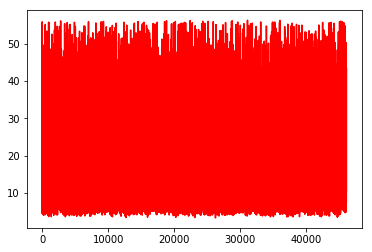

0.5471909254906389


In [15]:
# plt.plot(list(range(len(y_test) )),y_test_pred,'b')
# plt.axhline(y = np.average(y))
plt.plot(list(range(len(y_test) )),y_test_pred,'r')
plt.show()
print(optimized_rfr.score(X_test,y_test))

In [20]:
filename = '../data/optimized_rfr_nflstats_0.1.pkl'
pickle.dump(rfr, open(filename, 'wb'))

In [24]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=0)
from sklearn.svm import SVR

svr_params = {'C':np.logspace(1.0, 4.0, num=10),
              'epsilon': np.logspace(0, 1, num=10),
              'tol': np.logspace(-6, 1, num=10),
             }       
svr = SVR(kernel = 'rbf')

sa = SimulatedAnneal(svr, svr_params, T=10.0, T_min=9, alpha=0.75,
                         verbose=True, scoring='r2',n_jobs = 4,cv=2)
sa.fit(X_train, y_train)

# Print the best score and the best params
print(sa.best_score_, sa.best_params_)
# Use the best estimator to predict classes
optimized_clf = sa.best_estimator_
y_test_pred = optimized_clf.predict(X_test)



INFO: Number of possible iterations given cooling schedule: 3



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:   10.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    9.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


2 T: 10.00000, score: 0.453074, std: 0.002453, params: {'C': 21.544, 'epsilon': 2.154, 'tol': 0.0}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:   11.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


3 T: 10.00000, score: 0.444242, std: 0.002358, params: {'C': 21.544, 'epsilon': 1.0, 'tol': 0.0}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    8.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


4 T: 10.00000, score: 0.461771, std: 0.000341, params: {'C': 21.544, 'epsilon': 3.594, 'tol': 0.0}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    9.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


5 T: 10.00000, score: 0.412357, std: 0.010057, params: {'C': 464.159, 'epsilon': 3.594, 'tol': 0.0}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    9.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


6 T: 10.00000, score: 0.395301, std: 0.012014, params: {'C': 4641.589, 'epsilon': 3.594, 'tol': 0.0}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    9.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


7 T: 10.00000, score: 0.382368, std: 0.011461, params: {'C': 4641.589, 'epsilon': 2.783, 'tol': 0.0}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    9.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


8 T: 10.00000, score: 0.382640, std: 0.011614, params: {'C': 4641.589, 'epsilon': 2.783, 'tol': 0.278}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    9.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


9 T: 10.00000, score: 0.457357, std: 0.002262, params: {'C': 21.544, 'epsilon': 2.783, 'tol': 0.278}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    9.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


10 T: 10.00000, score: 0.397791, std: 0.012055, params: {'C': 1000.0, 'epsilon': 2.783, 'tol': 0.278}


[Parallel(n_jobs=4)]: Done   2 out of   2 | elapsed:    5.4s finished
c:\users\rayner\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


11 T: 10.00000, score: 0.436974, std: 0.018153, params: {'C': 1000.0, 'epsilon': 7.743, 'tol': 0.278}
0.4617709018133385 {'C': 21.544346900318832, 'epsilon': 3.5938136638046276, 'tol': 5.994842503189409e-06}


In [16]:
plt.plot(list(range(train_n,len(y))),rfr.predict(X[train_n:]) ,'r')

plt.show()
print(rfr.score(X[train_n:],y[train_n:]))

NameError: name 'train_n' is not defined

In [26]:
residual = y_test_pred - y_test

count = [v for v in list(residual) if np.abs(v) < 5]
plt.plot(list(range(len(y_test))))
print(len(count)/len(residual))
print(np.mean(residual))

print(np.var(residual))



0.4100099796068903
-0.2958419595708836
93.5778268931566
